# Problem 1

You are a SpaceX engineer, planning a mission to Mars. Consider the problem of planetary motion of the planets around the Sun, as discussed during lecture 8. Let’s focus on the motion of the Earth.

a. Write down analytical expressions for planetary motion.

b. Make a sketch of the planetary motion that helps to setup the problem.

c. Code the function that creates the derivatives of the ODE.

d. Choose an algorithm to solve the ODE. Explain your choice of algorithm.

e. Solve the ODE. Use a set of boundary conditions where vx(t = 0) = 0.

f. Plot your results. Label your plot!

g. Change your boundary conditions such that vy is twice the value used in part e.
Solve the new ODE. Discuss the consequences of the new boundary conditions for the resulting motion.

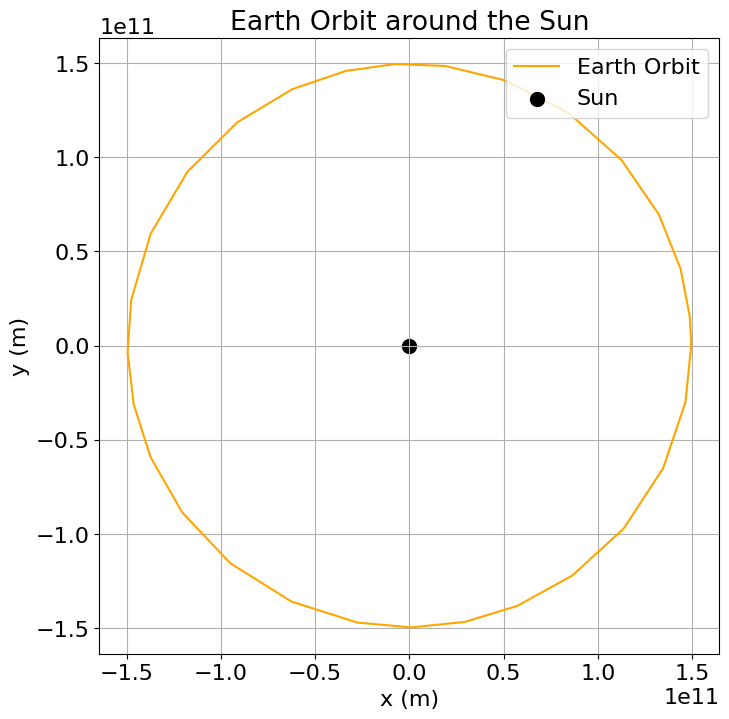

In [ ]:
from scipy.integrate import RK45
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Differential equations for the Earth's motion
def ode_system(t, y):
    x, vx, y, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return [vx, ax, vy, ay]

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30     # Mass of the Sun, kg

# Initial conditions for a nearly circular orbit
r_earth = 1.496e11  # Distance from Earth to Sun, meters
speed_earth = np.sqrt(G * M / r_earth)  # Orbital speed of Earth, m/s
initial_conditions = [r_earth, 0, 0, speed_earth]

# Time span (one year)
t_end = 365.25 * 24 * 3600  # End time in seconds

# Create an RK45 object
rk45_solver = RK45(ode_system, t0=0, y0=initial_conditions, t_bound=t_end, rtol=1e-6, atol=1e-9)

# Lists to store the solution
t_values = []
x_values = []
y_values = []

# Solving the ODE
while rk45_solver.status == 'running':
    rk45_solver.step()
    if rk45_solver.t <= t_end:
        t_values.append(rk45_solver.t)
        x_values.append(rk45_solver.y[0])
        y_values.append(rk45_solver.y[2])

# Plot the Earth's orbit
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label='Earth Orbit', color ='orange')
plt.scatter(0, 0, color='black', label='Sun', s=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth Orbit around the Sun')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.axis('equal')
plt.show()


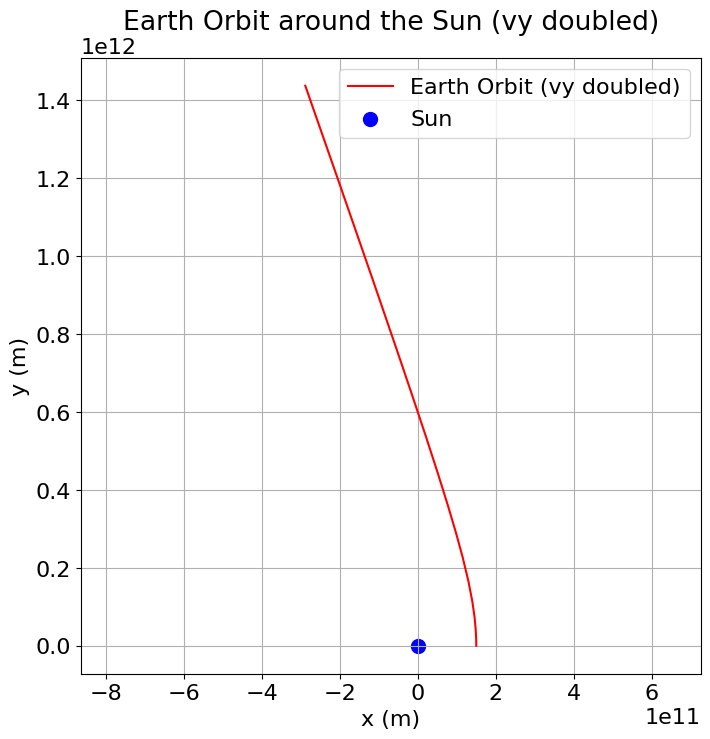

In [ ]:
# New initial conditions with vy doubled
initial_conditions_vy_doubled = [r_earth, 0, 0, 2 * speed_earth]

# Create an RK45 object for the new initial conditions
rk45_solver_vy_doubled = RK45(ode_system, t0=0, y0=initial_conditions_vy_doubled, t_bound=t_end, rtol=1e-6, atol=1e-9)

# Lists to store the solution
t_values_vy_doubled = []
x_values_vy_doubled = []
y_values_vy_doubled = []

# Solving the ODE with the new boundary conditions
while rk45_solver_vy_doubled.status == 'running':
    rk45_solver_vy_doubled.step()
    if rk45_solver_vy_doubled.t <= t_end:
        t_values_vy_doubled.append(rk45_solver_vy_doubled.t)
        x_values_vy_doubled.append(rk45_solver_vy_doubled.y[0])
        y_values_vy_doubled.append(rk45_solver_vy_doubled.y[2])

# Plot the Earth's orbit with vy doubled
plt.figure(figsize=(8, 8))
plt.plot(x_values_vy_doubled, y_values_vy_doubled, label='Earth Orbit (vy doubled)', color='r')
plt.scatter(0, 0, color='blue', label='Sun', s=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth Orbit around the Sun (vy doubled)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Problem 2

a) Write down 3 non-trivial problems from any physics class (or book) where ODEs cannot be solved analytically.

b) Select one of the following problems and solve it:

(i) A finite square well,(***)

(ii) A double pendulum

(iii) A Lorenz system.

Include a discussion on the physics problem.

In [ ]:
from scipy.optimize import fsolve

# Constants
hbar = 1.0  # Reduced Planck's constant (in atomic units)
m = 1.0     # Mass of the particle (in atomic units)
a = 1.0     # Half-width of the well
V0 = 10.0   # Well depth (in atomic units)

Bound state energy levels (in atomic units): [np.float64(-9.18025992623327), np.float64(-6.779060021410408), np.float64(-3.054233508773815), np.float64(-3.0542335087738146), np.float64(-1.0), np.float64(-0.16385618192485862)]


<ipython-input-14-4d70ebe5c176>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  odd_solution = fsolve(odd_equation, E_guess, args=(V0, a, m, hbar))


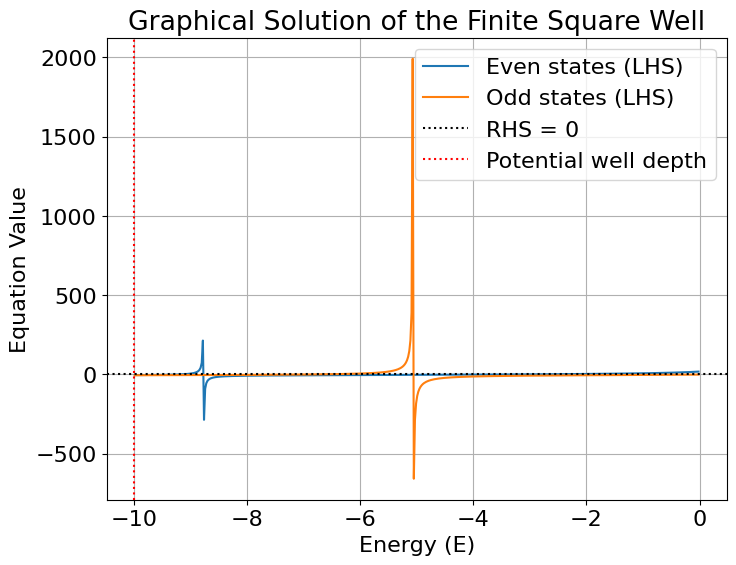

In [ ]:
# Define transcendental equations separately for even and odd states
def even_equation(E, V0, a, m, hbar):
    if V0 + E <= 0 or E >= 0:
        return np.inf  # Avoid undefined values
    k = np.sqrt(2 * m * (V0 + E)) / hbar
    kappa = np.sqrt(-2 * m * E) / hbar
    return k * np.tan(k * a) - kappa

def odd_equation(E, V0, a, m, hbar):
    if V0 + E <= 0 or E >= 0:
        return np.inf  # Avoid undefined values
    k = np.sqrt(2 * m * (V0 + E)) / hbar
    kappa = np.sqrt(-2 * m * E) / hbar
    return -k / np.tan(k * a) - kappa

# Solve for bound state energies
E_initial_guesses = [-9, -5, -1]  # Initial guesses
E_solutions = []

for E_guess in E_initial_guesses:
    even_solution = fsolve(even_equation, E_guess, args=(V0, a, m, hbar))
    odd_solution = fsolve(odd_equation, E_guess, args=(V0, a, m, hbar))

    if even_solution[0] < 0 and even_solution[0] not in E_solutions:
        E_solutions.append(even_solution[0])

    if odd_solution[0] < 0 and odd_solution[0] not in E_solutions:
        E_solutions.append(odd_solution[0])

# Sort and display results
E_solutions.sort()
print("Bound state energy levels (in atomic units):", E_solutions)

# Plot transcendental equation solutions
E_vals = np.linspace(-V0, 0, 500)
lhs_even_vals = np.array([even_equation(E, V0, a, m, hbar) for E in E_vals])
lhs_odd_vals = np.array([odd_equation(E, V0, a, m, hbar) for E in E_vals])
rhs_vals = np.zeros_like(E_vals)  # The right-hand side is zero

plt.figure(figsize=(8, 6))
plt.plot(E_vals, lhs_even_vals, label="Even states (LHS)")
plt.plot(E_vals, lhs_odd_vals, label="Odd states (LHS)")
plt.axhline(0, color="black", linestyle="dotted", label="RHS = 0")
plt.axvline(-V0, color="red", linestyle="dotted", label="Potential well depth")
plt.xlabel("Energy (E)")
plt.ylabel("Equation Value")
plt.title("Graphical Solution of the Finite Square Well")
plt.legend()
plt.grid()
plt.show()
